In [1]:
import pytae as pt
import pandas as pd

In [2]:
nums=['x','y','z']
non_nums=['a','b','c']
pt.create_qry('data','tbl',nums,non_nums)


'select a, b, c, sum(x) as x, sum(y) as y, sum(z) as z from data.tbl group by a, b, c;'

In [3]:
nums={'x':['sum','x1'],'y':['sum','y1'],'z':['sum','z1']}
non_nums=['a','b','c']

pt.create_qry('data','tbl',nums,non_nums)

'select a, b, c, sum(x) as x1, sum(y) as y1, sum(z) as z1 from data.tbl group by a, b, c;'

In [4]:
pt.create_qry('data','tbl',nums,non_nums,'where c=18')

'select a, b, c, sum(x) as x1, sum(y) as y1, sum(z) as z1 from data.tbl where c=18 group by a, b, c;'

In [5]:

df=pd.DataFrame({'id':['a','b','c','d','e','','f','f'],
                  'balance':[10,20,0,21,15,10,20,25],
                  'country':['sg','cn','ca','np','in','in','np','in']})

print(df.info())
df[['id','balance']].agg_df(type=['sum','min'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       8 non-null      object
 1   balance  8 non-null      int64 
 2   country  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes
None


,id,balance_sum,balance_min
0,,10,10
1,a,10,10
2,b,20,20
3,c,0,0
4,d,21,21
5,e,15,15
6,f,45,20


In [6]:
df[['id','balance']].agg_df()

,id,balance_sum
0,,10
1,a,10
2,b,20
3,c,0
4,d,21
5,e,15
6,f,45


In [7]:
df[['id','balance']].agg_df(type=['sum','min','n'])

,id,balance_sum,balance_min,n
0,,10,10,1
1,a,10,10,1
2,b,20,20,1
3,c,0,0,1
4,d,21,21,1
5,e,15,15,1
6,f,45,20,2


In [8]:
df[['id','balance']].agg_df(type=['n','mean'])

,id,n,balance_mean
0,,1,10.0
1,a,1,10.0
2,b,1,20.0
3,c,1,0.0
4,d,1,21.0
5,e,1,15.0
6,f,2,22.5


In [9]:
df[['id','balance']].agg_df(type=['min'])

,id,balance_min
0,,10
1,a,10
2,b,20
3,c,0
4,d,21
5,e,15
6,f,20


In [10]:
df[['id','balance']].agg_df(type=['mean'])

,id,balance_mean
0,,10.0
1,a,10.0
2,b,20.0
3,c,0.0
4,d,21.0
5,e,15.0
6,f,22.5


In [11]:
df[['id','balance']].agg_df()

,id,balance_sum
0,,10
1,a,10
2,b,20
3,c,0
4,d,21
5,e,15
6,f,45


In [12]:
help(pd.DataFrame.agg_df)

Help on function agg_df in module pytae.extend_pandas:

agg_df(self, **kwargs)
    Aggregate the DataFrame based on specified aggregation types, ensuring that aggregated
    column names, including 'n' for counts, follow the specified order in the 'type' list.
    
    Parameters:
    - self (DataFrame): The pandas DataFrame to be aggregated.
    - **kwargs:
        - type (list): Specifies the types of aggregation to perform on numeric columns
                       and 'n' for counting. The order in the list determines the column order
                       in the result. Includes 'sum', 'mean', 'max', 'min', and 'n'.
                       Ensures no duplicate types. Defaults to ['sum'].
    
    Returns:
    - DataFrame: The aggregated DataFrame with specified aggregations applied. Column names
                 for aggregated values are updated to include the aggregation type.



In [13]:
df[['id','balance']].agg_df(type=['sum'])

,id,balance_sum
0,,10
1,a,10
2,b,20
3,c,0
4,d,21
5,e,15
6,f,45


<Axes: xlabel='island'>

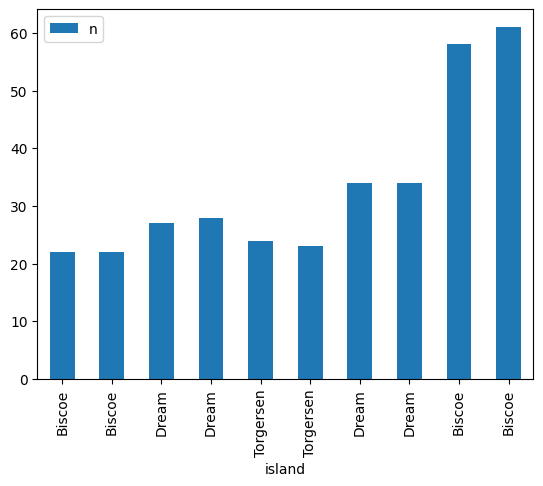

In [14]:
import seaborn as sns
# Assuming penguins dataset is loaded
penguins = sns.load_dataset('penguins')
penguins.agg_df(type=['n']).plot(kind='bar',x='island')

In [15]:
penguins.agg_df(type=['n','sum'])

,species,island,sex,n,bill_length_mm_sum,bill_depth_mm_sum,flipper_length_mm_sum,body_mass_g_sum
0,Adelie,Biscoe,Female,22,821.9,389.5,4118.0,74125.0
1,Adelie,Biscoe,Male,22,893.0,418.8,4189.0,89100.0
2,Adelie,Dream,Female,27,996.6,475.7,5072.0,90300.0
3,Adelie,Dream,Male,28,1122.0,527.5,5374.0,113275.0
4,Adelie,Torgersen,Female,24,901.3,421.2,4519.0,81500.0
5,Adelie,Torgersen,Male,23,933.5,446.0,4483.0,92800.0
6,Chinstrap,Dream,Female,34,1583.5,598.0,6519.0,119925.0
7,Chinstrap,Dream,Male,34,1737.2,654.6,6797.0,133925.0
8,Gentoo,Biscoe,Female,58,2642.7,825.8,12337.0,271425.0
9,Gentoo,Biscoe,Male,61,3017.9,958.8,13514.0,334575.0


In [16]:
penguins.long(col='features',value='value').value.sum()

1526600.0

In [17]:
penguins.long(col='features',
              value='value').wide(col='features',aggfunc='sum').long(col='features',value='value').value.sum()

1526600.0

In [18]:
penguins.long(col='features',
              value='value').wide(col='features')

pivot_table is used with sum as agg because Index contains duplicate entries.


,species,island,sex,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,Adelie,Biscoe,Female,389.5,821.9,74125.0,4118.0
1,Adelie,Biscoe,Male,418.8,893.0,89100.0,4189.0
2,Adelie,Biscoe,NaN,NaN,NaN,NaN,NaN
3,Adelie,Dream,Female,475.7,996.6,90300.0,5072.0
4,Adelie,Dream,Male,527.5,1122.0,113275.0,5374.0
5,Adelie,Dream,NaN,18.9,37.5,2975.0,179.0
6,Adelie,Torgersen,Female,421.2,901.3,81500.0,4519.0
7,Adelie,Torgersen,Male,446.0,933.5,92800.0,4483.0
8,Adelie,Torgersen,NaN,72.7,151.7,14725.0,749.0
9,Chinstrap,Biscoe,Female,NaN,NaN,NaN,NaN


In [19]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [20]:
df.wide(col='bar', value='baz')

,foo,zoo,A,B,C
0,one,x,1.0,NaN,NaN
1,one,y,NaN,2.0,NaN
2,one,z,NaN,NaN,3.0
3,two,q,4.0,NaN,NaN
4,two,t,NaN,NaN,6.0
5,two,w,NaN,5.0,NaN


In [21]:
(penguins
.query("island == 'Biscoe'")                                          #dplyr filter
.filter(items=['species', 'island', 'bill_length_mm', 'body_mass_g']) #dplyr select 
.assign(bill_length_cm=lambda x: x.bill_length_mm / 10)               #dplyr mutate
.groupby(['species', 'island'])                                       #dplyr groupby
.agg(mean_bill_length_cm=('bill_length_cm', 'mean'),                  #dplyr summarize
     mean_body_mass_g=('body_mass_g', 'mean'),
     count=('species', 'size'))
.reset_index()                                                        #dplyr ungroup
.sort_values('mean_body_mass_g', ascending=False)                     #dplyr arrange
.drop(columns=['island'])                                             #dplyr select
.rename(columns={'species':'type'})                                   #dplyr rename
)


,type,mean_bill_length_cm,mean_body_mass_g,count
1,Gentoo,4.750488,5076.016260,124
0,Adelie,3.897500,3709.659091,44
